In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [5]:
# Load data
df = pd.read_csv(r'netflix1.csv')
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# Check for missing values
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [6]:
# Treat placeholder missing values as NaN
for col in ['director', 'country']:
    df[col].replace("Not Given", np.nan, inplace=True)


<ipython-input-6-01a964b8804f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace("Not Given", np.nan, inplace=True)


In [7]:
# Handle missing values (could fill or drop as needed)
# For analysis, we may drop rows missing critical info or fill with "Unknown"
df = df.drop_duplicates()  # remove duplicate records:contentReference[oaicite:4]{index=4}
# (Other missing handling like df.dropna() or df.fillna() could be applied here)


In [8]:
# Convert date_added to datetime for time-series analysis
df['date_added'] = pd.to_datetime(df['date_added'])  # use pandas to_datetime:contentReference[oaicite:5]{index=5}

# Split comma-separated genres into list
df['genres_list'] = df['listed_in'].str.split(',')  # splits each genre string into a list:contentReference[oaicite:6]{index=6}


In [9]:
# Verify cleaning steps
print(df[['date_added','genres_list']].head())

  date_added                                        genres_list
0 2021-09-25                                    [Documentaries]
1 2021-09-24  [Crime TV Shows,  International TV Shows,  TV ...
2 2021-09-24             [TV Dramas,  TV Horror,  TV Mysteries]
3 2021-09-22              [Children & Family Movies,  Comedies]
4 2021-09-24  [Dramas,  Independent Movies,  International M...


In [10]:
# Count number of genres per title
df['genre_count'] = df['genres_list'].apply(len)

In [11]:
# Extract numeric duration (minutes or seasons)
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(int)  # numeric part
df['duration_unit'] = df['duration'].apply(lambda x: 'min' if 'min' in x else ('Season' if 'Season' in x else ''))


<ipython-input-12-7a2365957bb6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


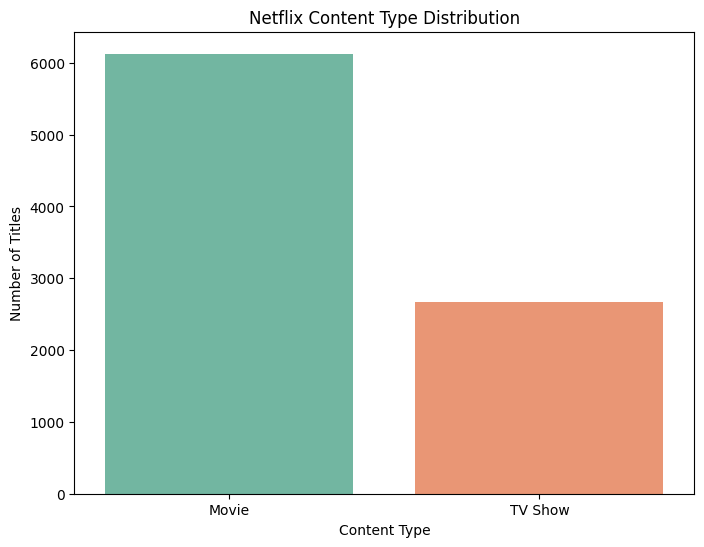

In [12]:
# Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Netflix Content Type Distribution')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

<ipython-input-13-6d65837c2441>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


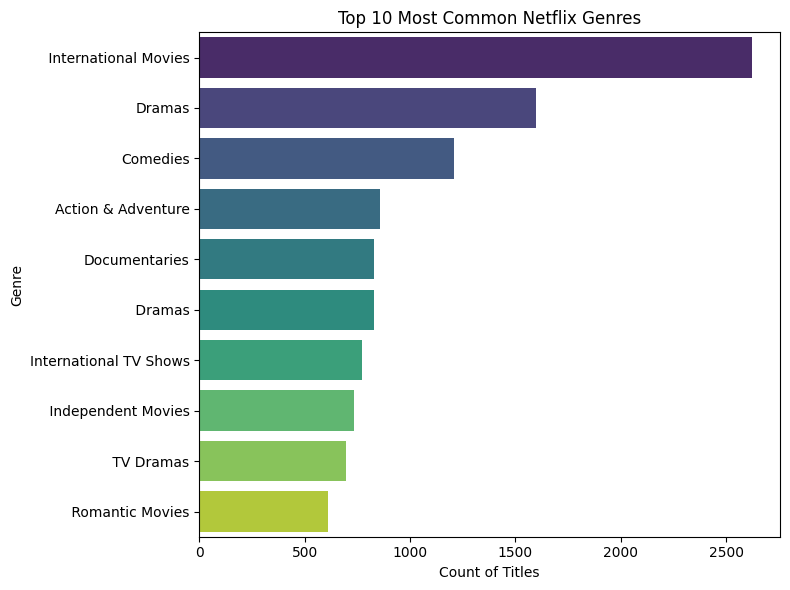

In [13]:
# Most Common Genres
all_genres = df['genres_list'].explode()
genre_counts = all_genres.value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Common Netflix Genres')
plt.xlabel('Count of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('top_genres.png')  # Save figure for notebook


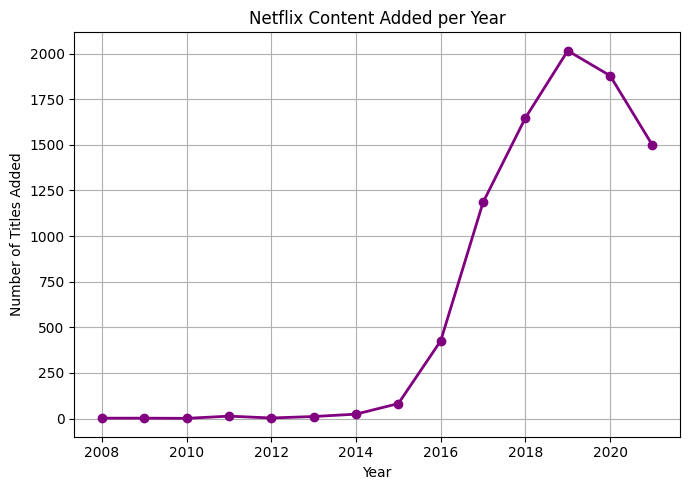

In [14]:
# content added over years
df['year_added'] = df['date_added'].dt.year
yearly_counts = df.groupby('year_added').size()

plt.figure(figsize=(7,5))
yearly_counts.plot(marker='o', color='purple', linewidth=2)
plt.title('Netflix Content Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.tight_layout()
plt.savefig('content_added_yearly.png')

<ipython-input-15-20aefcccfefc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='coolwarm')


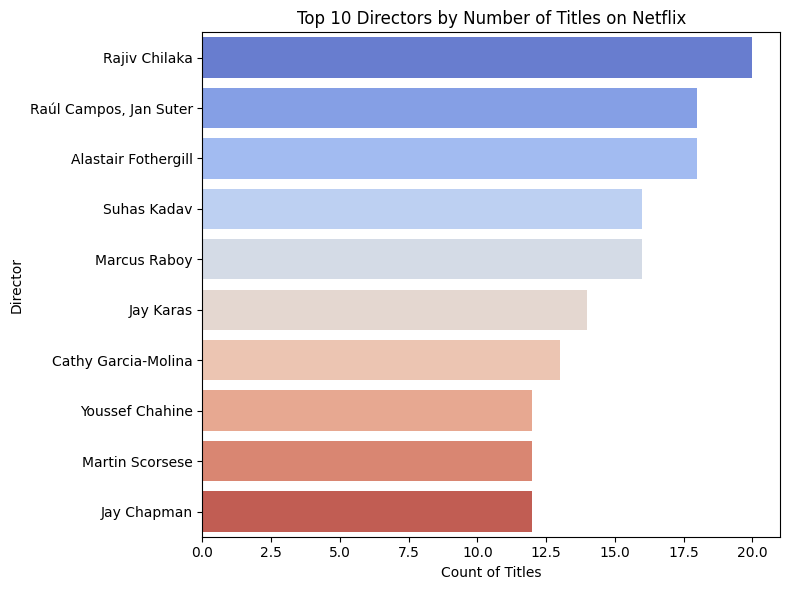

In [15]:
# Top 10 directors
director_counts = df['director'].dropna().value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='coolwarm')
plt.title('Top 10 Directors by Number of Titles on Netflix')
plt.xlabel('Count of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.savefig('top_directors.png')

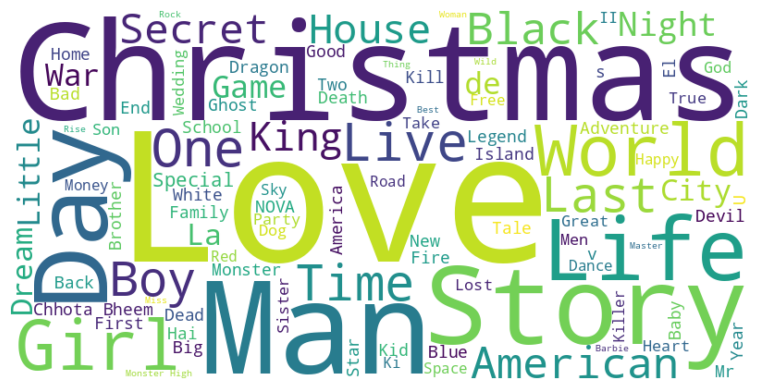

In [16]:
# word cloud of movie titles
titles = df[df['type']=='Movie']['title'].dropna().str.cat(sep=' ')
stopwords = set(STOPWORDS) | {"Movie","movie","The","the"}
wc = WordCloud(width=800, height=400, background_color='white',
               stopwords=stopwords, max_words=100).generate(titles)

plt.figure(figsize=(8,4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('wordcloud_titles.png')

In [17]:
#saving the cleaned dataset
df.to_csv('netflix_cleaned.csv', index=False)